# Assignment 1

## Assignment Guide

* Answer **ALL** questions.
* Total marks: 30.
* Data for Questions 1 & 2 are available from the course L@G website. Data for Question 3 can be loaded from the internet.
* Use Jupyter Notebook/Python to achieve the answers. 
* Type up your answers in a Word file (you may copy & paste some of the Python outcomes to the file).
* Assignment submission: **`upload two files`** – [1] the Word file [2] the Jupyter Notebook/Python file (either pdf (preferred) or ipynb). 10 marks will be deducted if only one file is submitted.
* A title page is required for the Word file with the safe assignment check. 5 marks off without safe assignment check.
* Late submission without approval is subject to penalty (10% off per day).
* **`Due: 11:59pm, (Thursday) 20-August-2020`**


In [1]:
# import essential libraries
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set() 

## Question 1 (9 marks)

Use dataset stock_p2.csv to answer this question. The dataset has three columns: date, coke, and pepsi, where coke and pepsi are daily stock prices (at close) of Coca-Cola Bottling Co. Consolidated and PepsiCo, Inc., respectively, from 1990-12-31 to 2020-06-30.

1. How many rows and columns are in the dataset? Set "Date" as the row index. Print out the last 5 observations in year `2019`. 
2. Find the dates that Coke & Pepsi stocks reach their highest price levels, respectively. Find the dates that the two companies have the same level of stock price. 
3. Compute the “log-return” (as defined in Topic 4) of the two stocks. Make violinplots of the two returns (specify inner as quartile). Comment on the results.
4. Find mean, standard deviation, skewness, and kurtosis of Coke & Pepsi returns, respectively. Comment on the results.
5. Make a scatterplot of the two returns with a fitted line & compute the correlation coefficient of them. Comment on the results.
6. Consider three subperiods: [1] 1990.12.31 to 1999.12.31 [2] 2000.01.01 to 2009.12.31 [3] 2010.01.01 to 2020.06.30. Redo the previous question (part 5) for each of the three subperiods. Comment on the relationship of Coke & Pepsi stock returns over the three subperiods.

In [2]:
# load data, turn Date into datetime format, set Date as the index
sp2=pd.read_csv('stock_p2.csv', parse_dates=['Date'], dayfirst = True)
sp2.head()

,Date,coke,pepsi
0,1990-12-31,19.00,13.0000
1,1991-01-02,18.25,12.8750
2,1991-01-03,17.50,12.5000
3,1991-01-04,16.75,12.4375
4,1991-01-07,16.75,12.1250


In [3]:
#problem 1 How many rows and columns are in the dataset? Set "Date" as the row index. Print out the last 5 observations in year 2019

In [4]:
row = sp2.shape[0]
column = sp2.shape[1]
print ("row is %s,column is %i" % (row,column))
sp2 = sp2.set_index('Date')
data_2019 = sp2[(sp2.index >'2018-12-31') & (sp2.index <='2019-12-31')]
data_2019.tail(5)

row is 7432,column is 3


,coke,pepsi
Date,,
2019-12-24,286.440002,136.889999
2019-12-26,292.640015,136.690002
2019-12-27,293.649994,137.539993
2019-12-30,289.000000,136.809998
2019-12-31,284.049988,136.669998


In [5]:
#problem 2  
#I.Find the dates that Coke & Pepsi stocks reach their highest price levels, respectively.
Date_Coke = sp2[sp2['coke'] == sp2.max()[0]].index.strftime("%Y-%m-%d")[0]
Date_Pepsi =  sp2[sp2['pepsi'] == sp2.max()[1]].index.strftime("%Y-%m-%d")[0]

print ("highest price Date of Coke is %s,the price is %f" % (Date_Coke,sp2.max()[0]))
print ("highest price Date of Pepsi is %s,the price is %f" % (Date_Pepsi,sp2.max()[1]))
print("")
#II. Find the dates that the two companies have the same level of stock price.
for i in range(row):
    if (sp2.iloc[i,0] == sp2.iloc[i,1]) :
        Date_Same_Price = sp2.index[i].strftime("%Y-%m-%d")
        print ("the dates that the two companies have the same level of stock price %s,the price is %f" % (Date_Same_Price,sp2.iloc[i,1]))


highest price Date of Coke is 2019-05-13,the price is 399.859985
highest price Date of Pepsi is 2020-02-14,the price is 146.990005

the dates that the two companies have the same level of stock price 1992-04-03,the price is 17.500000
the dates that the two companies have the same level of stock price 1992-04-14,the price is 17.750000
the dates that the two companies have the same level of stock price 1993-04-21,the price is 18.750000
the dates that the two companies have the same level of stock price 1993-05-03,the price is 18.500000
the dates that the two companies have the same level of stock price 1996-07-23,the price is 33.250000
the dates that the two companies have the same level of stock price 2013-01-02,the price is 69.330002


In [6]:
#problem 3 
# I.Compute the “log-return” (as defined in Topic 4) of the two stocks. 
sp2_stock = sp2.copy()
sp2_stock['coke_t+1'] = sp2_stock['coke'].shift(-1)
sp2_stock['pepsi_t+1'] = sp2_stock['pepsi'].shift(-1)
sp2_stock['coke_log_return'] = np.log(sp2_stock['coke_t+1']) - np.log(sp2_stock['coke'])
sp2_stock['pepsi_log_return'] = np.log(sp2_stock['pepsi_t+1']) - np.log(sp2_stock['pepsi'])

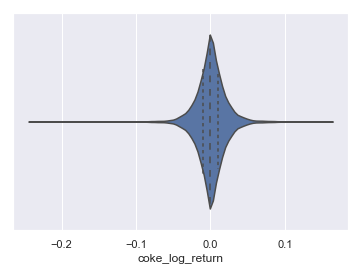

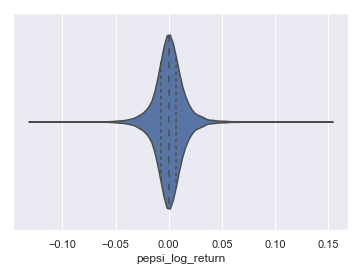

In [7]:
# II.Make violinplots of the two returns (specify inner as quartile). 
#Comment on the results.
plt.figure(1)
sns.violinplot(sp2_stock["coke_log_return"], inner = 'quartile');
plt.figure(2)
sns.violinplot(sp2_stock["pepsi_log_return"], inner = 'quartile');
plt.show()

#comment
#The figure above is a violinplots of Coca-Cola's log return, 
#and the figure below is a violinplots of Pepsi's log return. 
#It can be seen from the figure that the distribution of both log returns 
# basically conforms to the normal distribution. Coca-Cola’s quarter pitch
# is larger than Pepsi’s.

In [8]:
#problem 4
# Find mean, stastdd deviation, skewness, and kurtosis of Coke & Pepsi returns, respectively. Comment on the results.
pepsi_mean = sp2_stock['pepsi_log_return'].mean()
pepsi_std = sp2_stock['pepsi_log_return'].std()
pepsi_skew = sp2_stock['pepsi_log_return'].skew()
pepsi_kurt = sp2_stock['pepsi_log_return'].kurt()

print ("the mean of pepsi return is %f" % (pepsi_mean))
print ("the stastdd deviation of pepsi return is %f" % (pepsi_std))
print ("the skewness of pepsi return is %f" % (pepsi_skew))
print ("the kurtosis of pepsi return is %f" % (pepsi_kurt))
print("")

coke_mean = sp2_stock['coke_log_return'].mean()
coke_std = sp2_stock['coke_log_return'].std()
coke_skew = sp2_stock['coke_log_return'].skew()
coke_kurt = sp2_stock['coke_log_return'].kurt()

print ("the mean of coke return is %f" % (coke_mean))
print ("the stastdd deviation of coke return is %f" % (coke_std))
print ("the skewness of coke return is %f" % (coke_skew))
print ("the kurtosis of coke return is %f" % (coke_kurt))

#comment
#Coca-Cola and Pepsi's stock returns (daily frequency) are both greater than 0, which is about three ten thousandths. 
#The larger standard deviation of Coca-Cola proves that the risk of Coca-Cola stock is relatively greater. 
#Coca-Cola's skewness is less than zero, indicating a negative deviation, 
#while Pepsi's skewness is greater than zero, indicating a positive deviation. 
#Pepsi has greater kurtosis, indicating that its distribution is steeper.

the mean of pepsi return is 0.000312
the stastdd deviation of pepsi return is 0.014743
the skewness of pepsi return is 0.131009
the kurtosis of pepsi return is 10.027885

the mean of coke return is 0.000335
the stastdd deviation of coke return is 0.020342
the skewness of coke return is -0.287423
the kurtosis of coke return is 8.905689


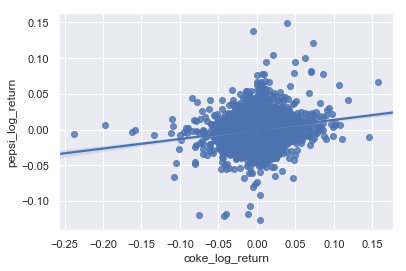

                  coke_log_return  pepsi_log_return
coke_log_return          1.000000          0.184534
pepsi_log_return         0.184534          1.000000


In [9]:
#problem5 
#I.Make a scatterplot of the two returns with a fitted line
sp2_plot = sp2_stock[['coke_log_return','pepsi_log_return']]
sns.regplot( x="coke_log_return", y="pepsi_log_return",data=sp2_plot )
plt.show()

#II.compute the correlation coefficient of them.
corr = sp2_plot.corr()
print(corr)

#III.Comment on the results.
#The correlation coefficient of Coca-Cola and Pepsi's stock returns is about 0.1845, 
#indicating a certain correlation, but the correlation coefficient is not high.

In [11]:
#problem 6
#Consider three subperiods: [1] 1990.12.31 to 1999.12.31 [2] 2000.01.01 to 2009.12.31 [3] 2010.01.01 to 2020.06.30. 
#Redo the previous question (part 5) for each of the three subperiods. Comment on the relationship of Coke & Pepsi stock returns over the three subperiods.

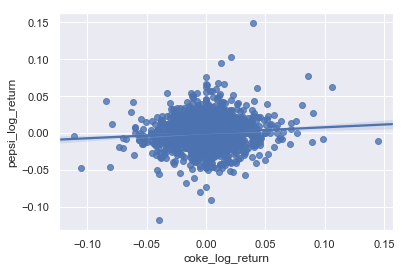

                  coke_log_return  pepsi_log_return
coke_log_return          1.000000          0.082912
pepsi_log_return         0.082912          1.000000


In [10]:
#subperiods: [1] 1990.12.31 to 1999.12.31
#I.Make a scatterplot of the two returns with a fitted line
data_90 = sp2_stock[(sp2_stock.index >'1990-12-31') & (sp2_stock.index <='1999-12-31')]
data_90 = data_90[['coke_log_return','pepsi_log_return']]
sns.regplot( x="coke_log_return", y="pepsi_log_return",data=data_90 )
plt.show()

#II.compute the correlation coefficient of them.
corr = data_90.corr()
print(corr)

#III.Comment on the results.
#Between 1990 and 1999, The correlation coefficient of Coca-Cola and Pepsi's stock returns is about 0.0829, 
#indicating a certain correlation, but the correlation coefficient is not high.

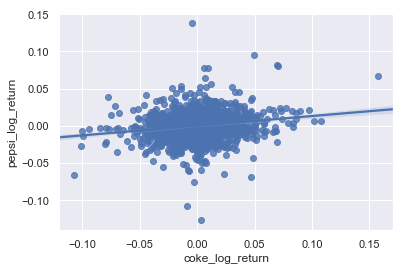

                  coke_log_return  pepsi_log_return
coke_log_return          1.000000          0.182495
pepsi_log_return         0.182495          1.000000


In [13]:
#subperiods: [2] 2000.01.01 to 2009.12.31
#I.Make a scatterplot of the two returns with a fitted line
data_00 = sp2_stock[(sp2_stock.index >'1999-12-31') & (sp2_stock.index <='2009-12-31')]
data_00 = data_00[['coke_log_return','pepsi_log_return']]
sns.regplot( x="coke_log_return", y="pepsi_log_return",data=data_00 )
plt.show()

#II.compute the correlation coefficient of them.
corr = data_00.corr()
print(corr)

#III.Comment on the results.
#Between 2000 and 2009, The correlation coefficient of Coca-Cola and Pepsi's stock returns is about 0.1825, 
#indicating a certain correlation, but the correlation coefficient is also not high.

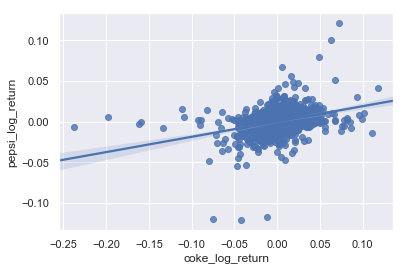

                  coke_log_return  pepsi_log_return
coke_log_return          1.000000          0.342898
pepsi_log_return         0.342898          1.000000


In [11]:
#subperiods: [3] 2010.01.01 to 2020.06.30.
#I.Make a scatterplot of the two returns with a fitted line
data_10 = sp2_stock[(sp2_stock.index >'2009-12-31') & (sp2_stock.index <='2020-06-30')]
data_10 = data_10[['coke_log_return','pepsi_log_return']]
sns.regplot( x="coke_log_return", y="pepsi_log_return",data=data_10 )
plt.show()

#II.compute the correlation coefficient of them.
corr = data_10.corr()
print(corr)

#III.Comment on the results.
#Between 2010 and 2020, The correlation coefficient of Coca-Cola and Pepsi's stock returns is about 0.3429, 
#Shows a stronger correlation, and we found that with the passage of time, 
#the correlation between Coca-Cola and Pepsi's stock returns has become stronger, 
#possibly due to the increasing number of mentors in common factors affecting their stock prices.

## Question 2 (15 marks)

Use data in w2000.csv to answer this question. The dataset contains information of top 2000 wealthiest persons in the world (of 2018), including the following columns: position, name, age, country, gender, wealthSource, industry, and worth (in millions of USD).

1. How many countries have at least one wealthiest person in the dataset? How many have at least one wealthiest man? How many have at least one wealthiest woman?
2. Make a list of the top 10 wealthiest women and compute the total wealth of them.
3. What are the top 20 countries having the majority of wealthiest persons? Make a bar chart showing the number of wealthiest persons for each of these countries.
4. Make two pie plots of total worth by each industry, one for Japan and another for South Korea. Compare the two plots.
5. Find the oldest wealthiest person of each industry in Australia. Find all wealthiest men in the world of the "finance & investments" industry who are over 90 years old. 
6. Find two lists of wealthiest persons -- first list contains those associated with Google (in terms of wealth source) and second list contains those with Facebook. Compare the average age across the two lists.
7. Which industry (apart from Philanthropy/NGO) has the highest percentage of wealthiest women? Are there any countries in the world with all wealthiest persons being female? 
8. Find the 10 most pupolar first names of wealthiest persons in the US. How many wealthiest men in the world are with first name 'Jack'?
9. Create a subset of the so-called BRICS countries (Brazil, Russia, India, China, South Africa). In total, how many wealthiest persons are from BRICS? What is the average age of them by each country? 
10.	Use the BRICS subset to make a boxplot of age by each industry, separated by gender with "hue" (in one graph). Comment on the plot.


In [12]:
w=pd.read_csv('w2000.csv')
w.head(5)

,position,name,age,country,gender,wealthSource,industry,worth
0,1,Jeff Bezos,54,United States,M,Amazon,Technology,112000
1,2,Bill Gates,62,United States,M,Microsoft,Technology,90000
2,3,Warren Buffett,87,United States,M,Berkshire Hathaway,Finance and Investments,84000
3,4,Bernard Arnault,69,France,M,LVMH,Fashion & Retail,72000
4,5,Mark Zuckerberg,34,United States,M,Facebook,Technology,71000


In [13]:
#problem1
#How many countries have at least one wealthiest person in the dataset? 
#How many have at least one wealthiest man? How many have at least one wealthiest woman?

n_total = int(len(w.groupby('country').count()))
w_man = w[w['gender'] == 'M']
w_woman = w[w['gender'] == 'F']
n_man_total = int(len(w_man.groupby('country').count()))
n_woman_total = int(len(w_woman.groupby('country').count()))

print ("%d countries have at least one wealthiest person" % (n_total))
print ("%d countries have at least one wealthiest man" % (n_man_total))
print ("%d countries have at least one wealthiest woman" % (n_woman_total))

72 countries have at least one wealthiest person
70 countries have at least one wealthiest man
33 countries have at least one wealthiest woman


In [14]:
#problem2 
#Make a list of the top 10 wealthiest women and compute the total wealth of them.
w_woman_head = w[w['gender'] == 'F']
w_woman_head.sort_values(by = 'worth')
w_woman_head = w_woman_head.head(10)
money = w_woman_head['worth'].sum() 
print ("the total wealth of the top 10 wealthiest woman is %d millions of USD" % (money))
w_woman_head.head(10)

the total wealth of the top 10 wealthiest woman is 242900 millions of USD


,position,name,age,country,gender,wealthSource,industry,worth
15,16,Alice Walton,68,United States,F,Walmart,Fashion & Retail,46000
17,18,Francoise Bettencourt Meyers,64,France,F,L'Oreal,Fashion & Retail,42200
30,32,Susanne Klatten,56,Germany,F,"BMW, pharmaceuticals",Automotive,25000
32,34,Jacqueline Mars,78,United States,F,"candy, pet food",Food and Beverage,23600
41,43,Yang Huiyan,36,China,F,real estate,Real Estate,21900
55,58,Laurene Powell Jobs,54,United States,F,"Apple, Disney",Philanthropy/NGO,18800
68,71,Gina Rinehart,64,Australia,F,mining,Metals & Mining,17400
77,81,Iris Fontbona,75,Chile,F,mining,Metals & Mining,16300
79,83,Abigail Johnson,56,United States,F,money management,Finance and Investments,15900
82,86,Charlene de Carvalho-Heineken,63,Netherlands,F,Heineken,Food and Beverage,15800


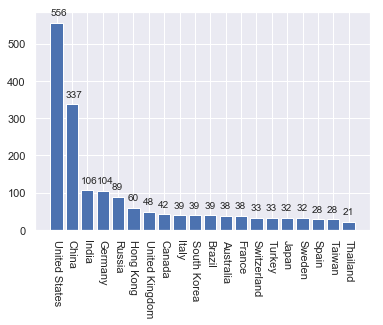

Index(['United States', 'China', 'India', 'Germany', 'Russia', 'Hong Kong',
       'United Kingdom', 'Canada', 'Italy', 'South Korea', 'Brazil',
       'Australia', 'France', 'Switzerland', 'Turkey', 'Japan', 'Sweden',
       'Spain', 'Taiwan', 'Thailand'],
      dtype='object', name='country')

In [15]:
#problem3
#What are the top 20 countries having the majority of wealthiest persons? 
#Make a bar chart showing the number of wealthiest persons for each of these countries.
countries = w.groupby('country').count()
countries.sort_values(by = 'position',inplace=True, ascending=False)
countries_plot = countries.head(20)

x_index = countries_plot.index
y = countries_plot['position']
#plt.barh(x_index, y, label='graph 1')
plt.bar(x_index, y, label='graph 1')
for x, y in enumerate(y):
    plt.text(x-0.4, y+20, "%s" %y)

plt.xticks(rotation=-90)
plt.show()
x_index

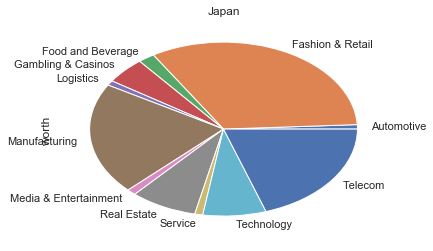

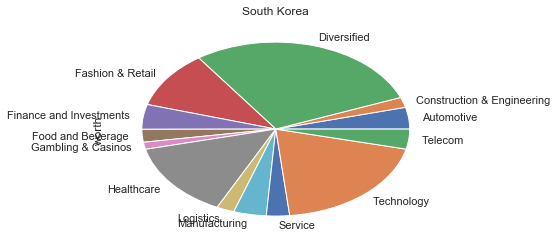

In [16]:
#problem4 
#Make two pie plots of total worth by each industry, one for Japan and another for South Korea. Compare the two plots.
Japan_data = w[w['country'] == 'Japan']
SK_data = w[w['country'] == 'South Korea']
Japan_series = Japan_data.groupby(by=['industry'])['worth'].sum()
SK_series = SK_data.groupby(by=['industry'])['worth'].sum()
plt.figure(3)
Japan_series.plot.pie(title='Japan')
plt.figure(4)
SK_series.plot.pie(title='South Korea')

#compare two plots
#The richest people in Japan are concentrated in Fashion & Retail, followed by Manufacturing and Telecom industries. 
#The top three industries for Koreans are Diversified, Technology care and Healthcare

In [17]:
#problem5
#Find the oldest wealthiest person of each industry in Australia.
Australia_data = w[w['country'] == 'Australia']
Australia_max = Australia_data.groupby('industry').apply(lambda t: t[t.age==t.age.max()])
Australia_max

,,position,name,age,country,gender,wealthSource,industry,worth
industry,,,,,,,,,
Automotive,281,294,Vivek Chaand Sehgal,61,Australia,M,auto parts,Automotive,6000
Construction & Engineering,1622,1680,Bob Ell,73,Australia,M,real estate,Construction & Engineering,1400
Diversified,749,787,Kerry Stokes,77,Australia,M,"construction equipment, media",Diversified,3100
Fashion & Retail,1368,1423,Gerry Harvey,78,Australia,M,retail,Fashion & Retail,1700
Finance and Investments,1124,1172,David Hains,87,Australia,M,Investment,Finance and Investments,2100
Food and Beverage,1300,1354,Jack Cowin,75,Australia,M,fast food,Food and Beverage,1800
Gambling & Casinos,1695,1756,Len Ainsworth,94,Australia,M,betting machines,Gambling & Casinos,1300
Logistics,653,687,Lindsay Fox,81,Australia,M,"logistics, real estate",Logistics,3400
Manufacturing,1673,1733,Manny Stul,69,Australia,M,toys,Manufacturing,1400


In [18]:
#Find all wealthiest men in the world of the "finance & investments" industry who are over 90 years old.
Financial_data = w[w['industry'] == 'Finance and Investments']
Financial_data = Financial_data[Financial_data['age']>=90]
Financial_data

,position,name,age,country,gender,wealthSource,industry,worth
268,281,Albert Frere,92,Belgium,M,investments,Finance and Investments,6200
935,976,Aloysio de Andrade Faria,97,Brazil,M,banking,Finance and Investments,2500
1035,1078,David Gottesman,92,United States,M,investments,Finance and Investments,2300
1210,1262,Peter Peterson,92,United States,M,investments,Finance and Investments,2000
1397,1452,Charles Munger,94,United States,M,Berkshire Hathaway,Finance and Investments,1700
1453,1509,Stephen Jarislowsky,92,Canada,M,money management,Finance and Investments,1600
1634,1692,George Joseph,96,United States,M,insurance,Finance and Investments,1400
1777,1841,Wilma Tisch,90,United States,F,diversified,Finance and Investments,1300


In [19]:
#problem 6
#Find two lists of wealthiest persons -- first list contains those associated with Google (in terms of wealth source) and 
#second list contains those with Facebook. Compare the average age across the two lists.
Facebook_data = w[w['wealthSource'] == 'Facebook']
Google_data = w[w['wealthSource'] == 'Google']
print(Facebook_data[['name','age','country','wealthSource','worth']])
print("")
print((Google_data[['name','age','country','wealthSource','worth']]))
Facebook_age = Facebook_data['age'].mean()
Google_age = Google_data['age'].mean()
print("")
print ("Google average is %f while Facebook average is %f" % (Google_age, Facebook_age))

                  name  age        country wealthSource  worth
4      Mark Zuckerberg   34  United States     Facebook  71000
98    Dustin Moskovitz   34  United States     Facebook  14000
142    Eduardo Saverin   36         Brazil     Facebook  10100
809    Jeff Rothschild   63  United States     Facebook   2900
907        Sean Parker   38  United States     Facebook   2600
1477   Sheryl Sandberg   48  United States     Facebook   1600

                         name  age        country wealthSource  worth
11                 Larry Page   45  United States       Google  48800
12                Sergey Brin   44  United States       Google  47500
102              Eric Schmidt   63  United States       Google  13400
236  Andreas von Bechtolsheim   62        Germany       Google   6800
277            David Cheriton   67         Canada       Google   6000

Google average is 56.200000 while Facebook average is 42.166667


In [20]:
#problem 7 
#Which industry (apart from Philanthropy/NGO) has the highest percentage of wealthiest women? 
industry_list = []
rate_list = []
for industry, industry_data in w.groupby('industry'):
    if industry == 'Philanthropy/NGO':
        continue
    count_women = len(industry_data[industry_data['gender']=='F'])
    rate = count_women/len(industry_data)
    rate_list.append(rate)
    industry_list.append(industry)
    
print( "the industry is %s,the highest percentage is %f" % (industry_list[rate_list.index(max(rate_list))],max(rate_list)) )

the industry is Food and Beverage,the highest percentage is 0.193548


In [21]:
#Are there any countries in the world with all wealthiest persons being female?
cty_list = []
for country, country_data in w.groupby('country'):
    count_women = len(country_data[country_data['gender']=='F'])
    rate = count_women/len(country_data)
    if rate == 1:
        print(country)
        print(country_data)
        cty_list.append(country)
        print("")
print(cty_list)

Angola
     position               name  age country gender wealthSource  \
892       933  Isabel dos Santos   45  Angola      F  investments   

                    industry  worth  
892  Finance and Investments   2600  

Portugal
     position                   name  age   country gender  \
363       382  Maria Fernanda Amorim   83  Portugal      F   

            wealthSource     industry  worth  
363  energy, investments  Diversified   5100  

['Angola', 'Portugal']


In [22]:
#problem 8
#Find the 10 most pupolar first names of wealthiest persons in the US. 
#How many wealthiest men in the world are with first name 'Jack'?
def get_firstName(Name):
        return(Name.split(' ')[0])
    
wp8 = w.copy()
w_p8 = wp8[wp8['country']=='United States']
w_p8['first_name'] = w_p8['name'].apply(get_firstName)
w_p8 = w_p8.groupby('first_name').count()
w_p8.sort_values(by = 'position',inplace=True,ascending=False)
print(w_p8.head(10)[['position']])


wp8['first_name'] = wp8['name'].apply(get_firstName)
Jack_data = wp8[wp8['first_name']=='Jack']
Jack_data

            position
first_name          
John              25
David             18
William           12
James             12
Robert            12
Thomas            11
Charles           10
Richard            9
Michael            8
George             8


F:\ana\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,position,name,age,country,gender,wealthSource,industry,worth,first_name
19,20,Jack Ma,53,China,M,e-commerce,Technology,39000,Jack
732,770,Jack Dorsey,41,United States,M,Twitter,Technology,3100,Jack
1300,1354,Jack Cowin,75,Australia,M,fast food,Food and Beverage,1800,Jack


In [23]:
#problem 9
#Create a subset of the so-called BRICS countries (Brazil, Russia, India, China, South Africa). 
#In total, how many wealthiest persons are from BRICS? What is the average age of them by each country?

Brics_data = w[(w['country'] == 'China')| (w['country'] == 'Brazil') |( w['country'] == 'Russia') | (w['country'] == 'India') | (w['country'] == 'South Africa')]
count_brics = int(len(Brics_data))
print( "%d wealthiest persons are from BRICS" % (count_brics))
age_china = w[w['country'] == 'China']['age'].mean()
age_Brazil = w[w['country'] == 'Brazil']['age'].mean()
age_Russia = w[w['country'] == 'Russia']['age'].mean()
age_India = w[w['country'] == 'India']['age'].mean()
age_sa = w[w['country'] == 'South Africa']['age'].mean()

print("")
print( "the average age of China is %f" % (age_china))
print( "the average age of Brazil is %f" % (age_Brazil))
print( "the average age of Russia is %f" % (age_Russia))
print( "the average age of India is %f" % (age_India))
print( "the average age of South Africa is %f" % (age_sa))

576 wealthiest persons are from BRICS

the average age of China is 55.706231
the average age of Brazil is 68.435897
the average age of Russia is 55.033708
the average age of India is 66.207547
the average age of South Africa is 63.200000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

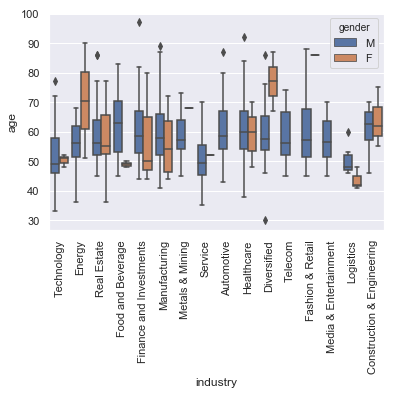

In [30]:
#problem 10
#Use the BRICS subset to make a boxplot of age by each industry, separated by gender with "hue" (in one graph). Comment on the plot.
sns.boxplot(x='industry', y='age', hue='gender', data=Brics_data)
plt.xticks(rotation=90)

#comment
#In the BRIC countries, the wealthest people in most industries are mainly between 50 and 70, 
#except for energy and diversified industries, where there are more women between 60 and 80. 
#The oldest appeared in the financial investment, close to 100 years old, 
#and the youngest diversified, about 30 years old.

## Question 3 (6 marks)

Load the data from the following link https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv and use the data to answer this question. Note that data from this link have been applied in Part 1, Topic 3. `Use data up to the end of July (2020-07-31).`

1. Find countries with deaths exceeding 10000. Get the first date for each of countries with more than 500000 confirmed cases.
2. Compute the overall daily death rate (i.e. "Deaths" divided "Confirmed" across all countries in each day) and plot it in a line chart. Identify the period that the overall daily death rate is higher than 5%.  
3. Make two rolling (moving-average) line plots (over 7 days) of new confirmed cases of Australia and Japan, respectively. Note: “new cases” is defined as the difference of confirmed cases over two consecutive days. Comment on the results.
4. Find countries in the world with at least one day having more than 10000 new cases. 


In [26]:
# get the Covid-19 data from the web (use data up to 2020-07-31)
# import data
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
covid = covid[covid.Date<='2020-07-31']
covid.tail(3)

In [71]:
#problem 1
#Find countries with deaths exceeding 10000. 
covid_serious = covid[covid['Deaths']>10000]
countries = set(np.array(covid_serious['Country']))
#covid_serious
countries

{'Brazil',
 'Colombia',
 'France',
 'India',
 'Iran',
 'Italy',
 'Mexico',
 'Peru',
 'Russia',
 'Spain',
 'US',
 'United Kingdom'}

In [85]:
#Get the first date for each of countries with more than 500000 confirmed cases.
covid_confirmed = covid[covid['Confirmed']>500000]
covid_confirmed
for x,y in covid_confirmed.groupby('Country'):
    print(x)
    print(y.head(1).Date)
    print("")

Brazil
24463   2020-05-31
Name: Date, dtype: datetime64[ns]

India
29407   2020-06-26
Name: Date, dtype: datetime64[ns]

Russia
26648   2020-06-11
Name: Date, dtype: datetime64[ns]

US
15214   2020-04-11
Name: Date, dtype: datetime64[ns]



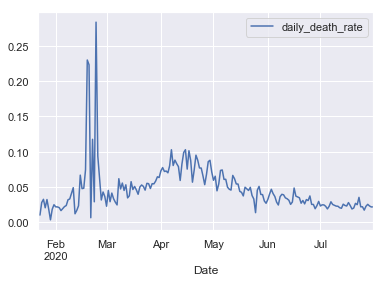

In [107]:
#problem 2
#Compute the overall daily death rate (i.e. "Deaths" divided "Confirmed" across all countries in each day) and 
#plot it in a line chart. Identify the period that the overall daily death rate is higher than 5%.
covid_plot = covid.copy()
covid_plot = covid_plot.groupby('Date').sum()
#covid_daily = covid_plot.diff()
covid_daily['daily_death_rate'] = covid_daily.Deaths/covid_daily.Confirmed
covid_daily_plot = covid_daily[['daily_death_rate']]
covid_daily_plot.plot()

#the period that the overall daily death rate is higher than 5%
#February to March, March to mid-May

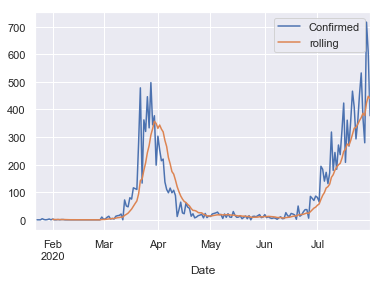

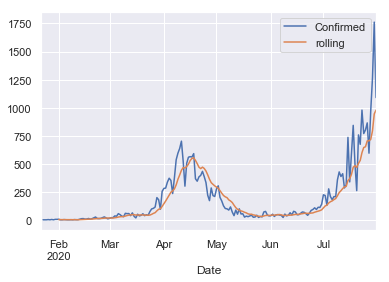

In [117]:
#problem 3
#Make two rolling (moving-average) line plots (over 7 days) of new confirmed cases of Australia and Japan, respectively.
#Note: “new cases” is defined as the difference of confirmed cases over two consecutive days. Comment on the results.
Australia_coviddata = covid[covid['Country']=='Australia']
Japan_coviddata = covid[covid['Country']=='Japan']
Australia_coviddata.set_index('Date',inplace=True)
Australia_coviddata = Australia_coviddata[['Confirmed']]

Japan_coviddata.set_index('Date',inplace=True)
Japan_coviddata = Japan_coviddata[['Confirmed']]

#Japan_coviddata.set_index('Date',inplace=True)

Australia_coviddata_new = Australia_coviddata.diff()
Japan_coviddata_new = Japan_coviddata.diff()
Australia_coviddata_new['rolling'] = Australia_coviddata_new['Confirmed'] .rolling(10).mean()
Australia_coviddata_new.plot()
Japan_coviddata_new['rolling'] = Japan_coviddata_new['Confirmed'] .rolling(10).mean()
Japan_coviddata_new.plot()
#pd.rolling_mean(Japan_coviddata_new['confirmed'], 10).plot(grid=True)

#comment
#The epidemics in Japan and Australia have reached two peaks. 
#The epidemic in Japan is more serious and it subsides not as fast as Australia. 
#Recently, both countries have ushered in a second wave of rebounds.

In [106]:
#problem 4
#Find countries in the world with at least one day having more than 10000 new cases.
covid_country = covid.copy()
covid_country_list = []
for x,y in covid_country.groupby('Country'):
    y.set_index('Date',inplace=True)
    y = y[['Confirmed']]
    daily_data = y.diff()
    
    daily_data_serious = daily_data[daily_data['Confirmed']>10000]
    count_daily = len(daily_data_serious)
    if count_daily >0:
        print(x)
        covid_country_list.append(x)
        #print(daily_data_serious)
        print("")
print(covid_country_list)

Brazil

Chile

China

Colombia

Ecuador

France

India

Kazakhstan

Kyrgyzstan

Pakistan

Peru

Russia

South Africa

US

['Brazil', 'Chile', 'China', 'Colombia', 'Ecuador', 'France', 'India', 'Kazakhstan', 'Kyrgyzstan', 'Pakistan', 'Peru', 'Russia', 'South Africa', 'US']
